<a href="https://colab.research.google.com/github/vishnu190/PYTHON-PROJECT-CA3/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/project.csv')
print(data.shape)
print(data.head)
print(data.columns)


(30000, 25)
<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
print(data.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

data["EDUCATION"] = data["EDUCATION"].replace({4:0,5:0,6:0})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [ ]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [ ]:
x_train=data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y_train=data['default payment next month']

In [ ]:
print(y_train.head)
y_train.describe()

<bound method NDFrame.head of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64>


count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [ ]:
df=pd.concat([x_train[['AGE','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',]],y_train],axis=1)


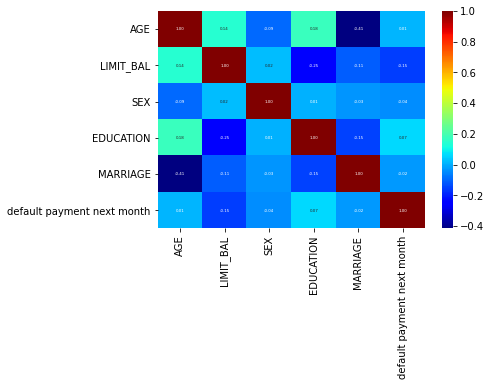

In [41]:
  # PERFORMING CO-RELATIONAL ANALYSIS
col=df.corr()

sns.heatmap(col,annot=True,cmap='jet',fmt='.2f',annot_kws={'size':4},
            cbar=True)
mask = np.zeros_like(col,dtype=np.bool)

cmap = sns.diverging_palette(220,10,as_cmap=True)



#i selected some of the features while creating a HEATMAP ,so that it would be clear

In [ ]:
#TO find performance 


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)


In [ ]:
pred_train #print

array([0.4749352 , 0.18018483, 0.23151337, ..., 0.72501295, 0.30287945,
       0.27675703])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE= ",mean_squared_error(y_train,pred_train))
print("R2= ",r2_score(y_train,pred_train))

In [ ]:

c=lr.intercept_
m=lr.coef_
print("SLOPE= ",m)
print("INTERCEPT= ",c)


SLOPE=  [-1.47502907e-07 -7.06530720e-08 -1.53158712e-02 -1.85240366e-03
 -2.18344454e-02  1.20503890e-03  9.59263228e-02  1.99484715e-02
  1.18637440e-02  7.48692454e-03 -6.48240118e-07  1.63915393e-07
  2.13237315e-08  3.81656596e-08 -7.58186286e-07 -2.22403003e-07
 -3.56108531e-08 -2.08553668e-07 -2.65810300e-07 -1.29281010e-07]
INTERCEPT=  0.2933661917508323


In [ ]:
#print('y=%.fx + %.2fc'%(m,c))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train['LIMIT_BAL'],pred_train,label='REGRESSION SCALE',c='y',lw=2)
plt.legend()

In [ ]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))


In [ ]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

In [ ]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

CLEARLY RIDGE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET AND LASSO


In [ ]:
# TERY ANOTHER MODEL
####### load a model
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

CLEARLY DECISION TREE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET


In [ ]:
#Try another model
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))